# ANA 540 Advanced Data Analytics Midterm Examination

## Part I Classification

In [415]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import os
import numpy as np
import urllib.request
import pandas as pd
import scipy
import seaborn as sns

import plotly.express as px
from plotly import graph_objs as go

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.animation as animation

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize = 12)
plt.rc('ytick', labelsize = 12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "midtermExam"

## Get the data and start Exploratory Data Analysis (EDA)

In [416]:
df = pd.read_csv(r'C:\Users\McDaniel\AppData\Local\Python\MidtermExamData/WI_breastCancer_prediction.csv')

print("shape of train data: ", df.shape)
print()
print()

print(df.info())
print()

shape of train data:  (569, 33)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float

In [417]:
y_train = df.diagnosis
x_train = df.iloc[:,22:32]

print()
print()

print(y_train.shape)
print()
print()
print(x_train.info())

df['diagnosis'] = df['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)
print(df['diagnosis'].describe())
print()
print()
print(y_train)



(569,)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_worst             569 non-null    float64
 1   texture_worst            569 non-null    float64
 2   perimeter_worst          569 non-null    float64
 3   area_worst               569 non-null    float64
 4   smoothness_worst         569 non-null    float64
 5   compactness_worst        569 non-null    float64
 6   concavity_worst          569 non-null    float64
 7   concave points_worst     569 non-null    float64
 8   symmetry_worst           569 non-null    float64
 9   fractal_dimension_worst  569 non-null    float64
dtypes: float64(10)
memory usage: 44.6 KB
None
count    569.000000
mean       0.372583
std        0.483918
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: diagnosis, dtype: float

In [418]:
print(df.shape)
df2 = pd.concat([y_train, x_train], axis=1)
print(df2.head())

print()
print()
print(df2.shape)

#horizontal_stack = pd.concat([survey_sub, survey_sub_last10], axis=1)

(569, 33)
  diagnosis  radius_worst  texture_worst  perimeter_worst  area_worst  \
0         M         25.38          17.33           184.60      2019.0   
1         M         24.99          23.41           158.80      1956.0   
2         M         23.57          25.53           152.50      1709.0   
3         M         14.91          26.50            98.87       567.7   
4         M         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601  

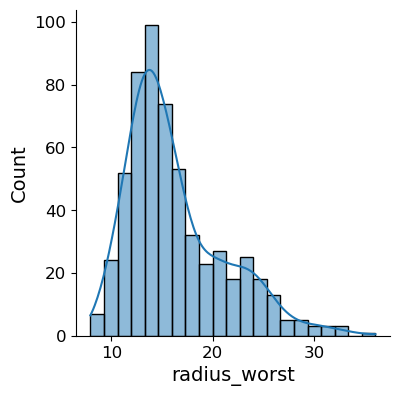

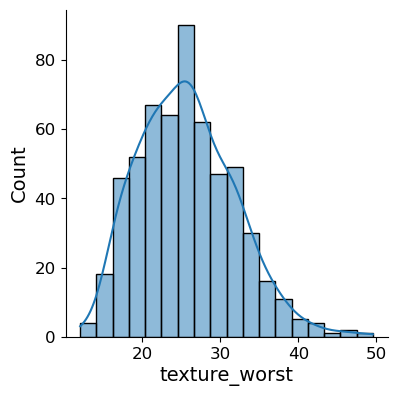

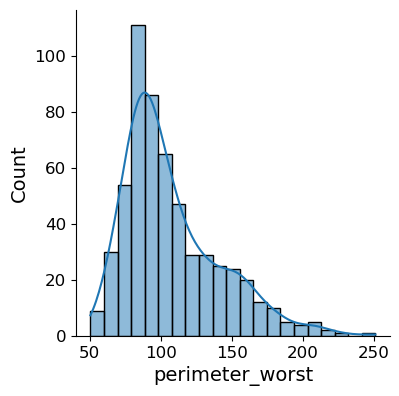

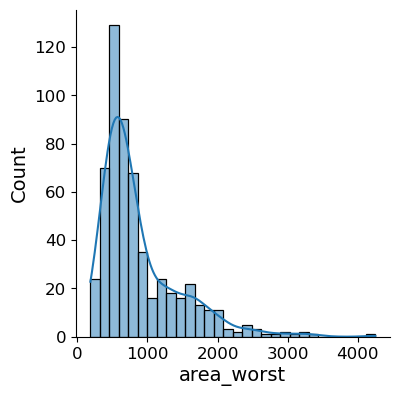

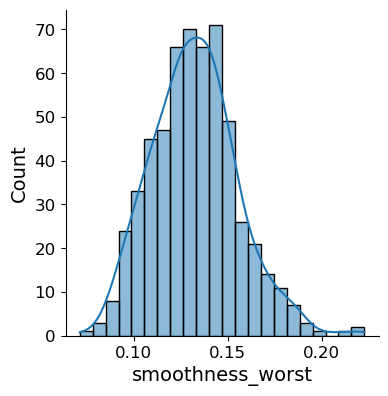

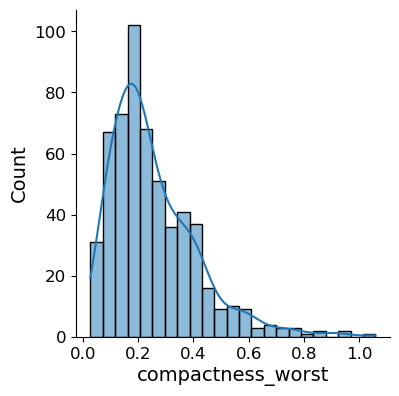

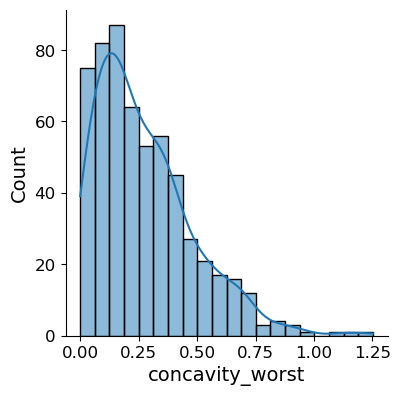

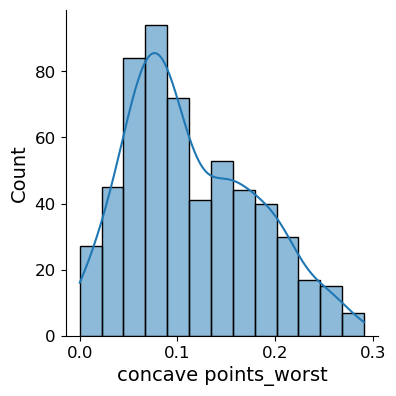

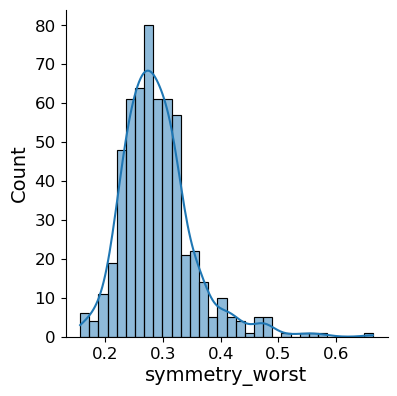

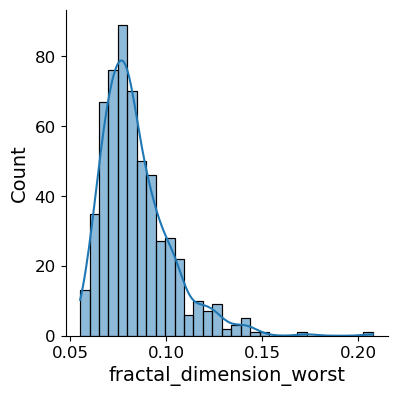

In [419]:
#This is really mixing up commands and doesn't make a bit of difference in classification but here are the histograms. 

plotnumber = 1

for column in x_train:
    if plotnumber <= 30:
        #ax = plt.subplot(5, 6, plotnumber)
        g = sns.displot(data=x_train[column], kde=True)
        plt.xlabel(column)
        g.fig.set_size_inches(4,4)
        plt.show()
        
    plotnumber += 1


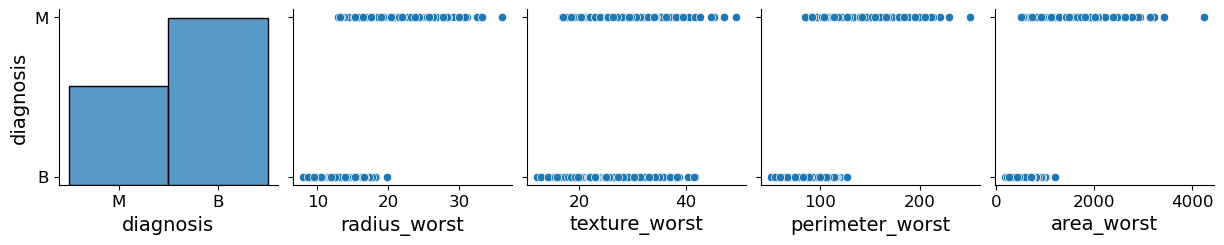

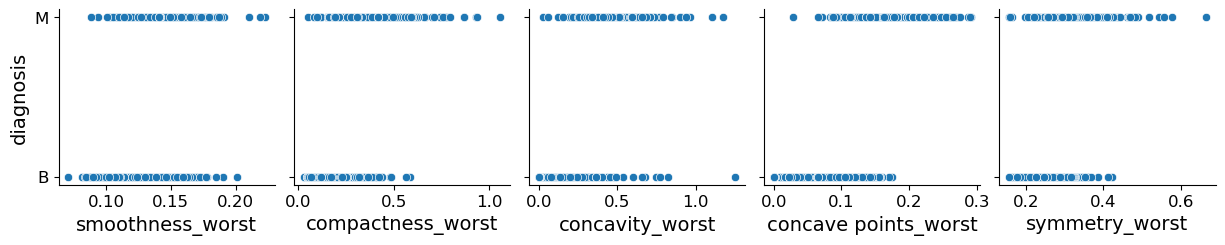

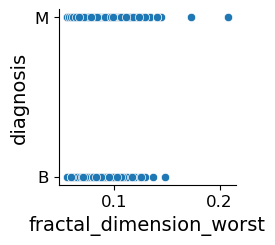

In [420]:
for i in range(0, len(df2.columns), 5):
    sns.pairplot(data=df2,
                x_vars=df2.columns[i:i+5],
                y_vars=['diagnosis'])


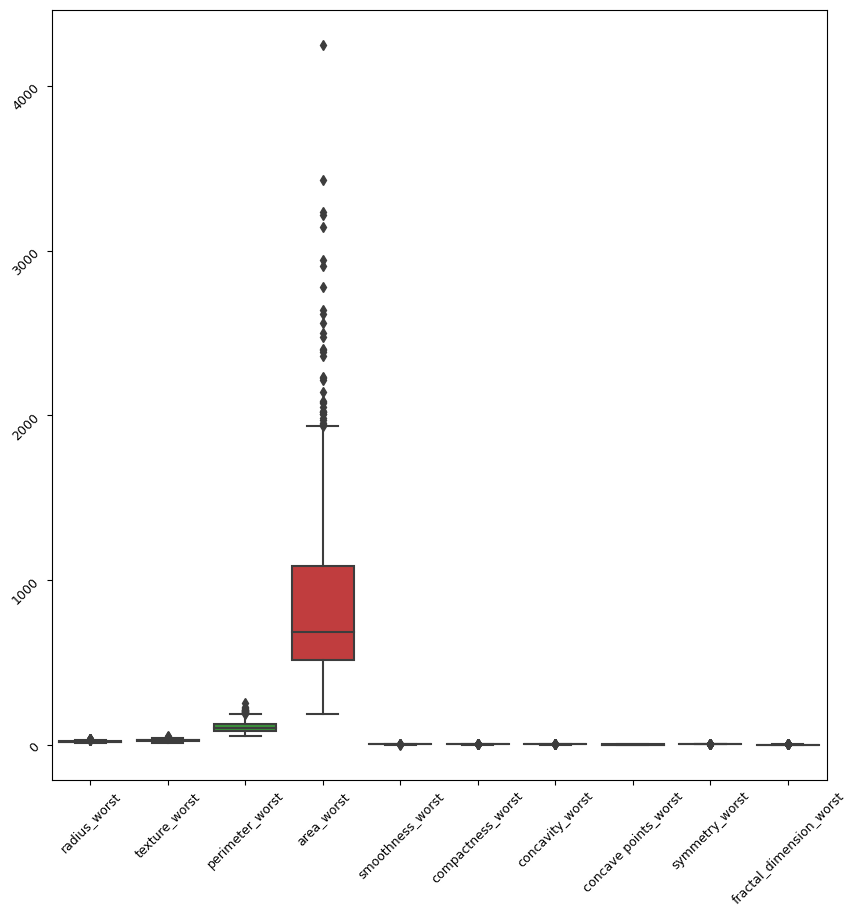

In [421]:
plt.figure(figsize = (10,10))
b= sns.boxplot(data=df2)
b.tick_params(labelsize=9, rotation=45);
#plt.ylim([0, 30])

It doesn't seem to make any difference which set of  variables you select.  There are big differences in their values so you will need to scale them to complete an analysis.  (Note that I commented out or deleted the EDA for this comparison so that the code isn't so long.) 

You can also do a heat map of the correlations and so on.  But for classification let's move on.  

## Randomize, split, scale, and code the data into training and test datasets.  

Now you can put all the variables back into one dataframe or proceed with x2_transform as the set of 
x variables and y_train as the target variable or class.  To make it easier to randomize the data and keep the correct target variable with its respective independent variables I'll use df2, the dataframe we made from the target variable and the "_worst" case values of x variables. Then, I'll split the target variable back out of the dataframe so that I can scale the x-variables.  Finally in this section, I'll split the data into training and test sets.   

In [422]:
#This will randomize the records in the dataset
df2 = df2.sample(frac=1).reset_index(drop=True)
#print()
#print()
print(df2.describe())

       radius_worst  texture_worst  perimeter_worst   area_worst  \
count    569.000000     569.000000       569.000000   569.000000   
mean      16.269190      25.677223       107.261213   880.583128   
std        4.833242       6.146258        33.602542   569.356993   
min        7.930000      12.020000        50.410000   185.200000   
25%       13.010000      21.080000        84.110000   515.300000   
50%       14.970000      25.410000        97.660000   686.500000   
75%       18.790000      29.720000       125.400000  1084.000000   
max       36.040000      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%      

In [423]:
#Do the training/test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df2_x,df2_y,test_size=0.2)

print("Training shape = ",x_train.shape)
print("Testing shape = ",x_test.shape)
print("Y_training shape = ", y_train.shape)
print("Y_test shape = ", y_test.shape)
print()
print()

Training shape =  (455, 10)
Testing shape =  (114, 10)
Y_training shape =  (455,)
Y_test shape =  (114,)




In [424]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x2_train_trans=pd.DataFrame(sc.fit_transform(x_train))
x2_train_trans.columns = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']
print()
print()
print(x2_train_trans.describe())

#Repeat for the test set
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x2_test_trans=pd.DataFrame(sc.fit_transform(x_test))

x2_test_trans.columns = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']
print()
print()
print(x2_test_trans.describe())



       radius_worst  texture_worst  perimeter_worst    area_worst  \
count  4.550000e+02   4.550000e+02     4.550000e+02  4.550000e+02   
mean  -1.185865e-16  -7.492175e-16     1.405469e-16 -1.024821e-16   
std    1.001101e+00   1.001101e+00     1.001101e+00  1.001101e+00   
min   -1.799122e+00  -2.223917e+00    -1.749966e+00 -1.289276e+00   
25%   -6.864115e-01  -7.441825e-01    -6.984145e-01 -6.595866e-01   
50%   -2.570980e-01  -5.162973e-02    -2.679786e-01 -3.335434e-01   
75%    5.500551e-01   6.886565e-01     5.894547e-01  3.782046e-01   
max    4.358022e+00   3.981423e+00     4.526521e+00  6.466377e+00   

       smoothness_worst  compactness_worst  concavity_worst  \
count      4.550000e+02       4.550000e+02     4.550000e+02   
mean       1.100463e-16      -3.974232e-17     1.232836e-16   
std        1.001101e+00       1.001101e+00     1.001101e+00   
min       -2.686384e+00      -1.440130e+00    -1.289559e+00   
25%       -6.884658e-01      -7.143072e-01    -7.679756e-01  

## Now consider Logistic Regression

In [425]:
#Build a model from the data
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x2_train_trans, y_train)

LogisticRegression()

In [426]:
# model predictions

y_pred = log_reg.predict(x2_test_trans)

In [427]:
# accuracy score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

print(accuracy_score(y_train, log_reg.predict(x2_train_trans)))

log_reg_acc = accuracy_score(y_test, log_reg.predict(x2_test_trans))
print(log_reg_acc)

0.978021978021978
0.9824561403508771


In [428]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print(confusion_matrix(y_test, y_pred))
print()
print()

print(f'\nTrue Positives: {tp}')
print(f'\nFalse Positives: {fp}')
print(f'\nTrue Negatives: {tn}')
print(f'\nFalse Negatives: {fn}')

print()
print()
print(f'True Positive Rate: { (tp / (tp + fn))}')
print(f'Specificity: { (tn / (tn + fp))}')
print(f'False Positive Rate: { (fp / (fp + tn))}')

tpr = (tp / (tp + fn))
fpr = (tn / (tn + fp))

[[71  0]
 [ 2 41]]



True Positives: 41

False Positives: 0

True Negatives: 71

False Negatives: 2


True Positive Rate: 0.9534883720930233
Specificity: 1.0
False Positive Rate: 0.0


In [429]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.97      1.00      0.99        71
           M       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## Or using stochastic gradient descent

In [430]:
#Implement SGD using textbook's companion website

from sklearn.linear_model import SGDClassifier
import time
start = time.time()

clf = SGDClassifier()
clf.fit(x2_train_trans, y_train)
prediction = clf.predict(x2_test_trans)
scores = cross_val_score(clf, x2_train_trans, y_train, cv=5)

end = time.time()

# accuracy_all.append(accuracy_score(prediction, y_test))
# cvs_all.append(np.mean(scores))

print("SGD Classifier Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))
print(classification_report( y_test,prediction))

SGD Classifier Accuracy: 98.25%
Cross validation score: 94.73% (+/- 1.64%)
Execution time: 0.031293 seconds 

              precision    recall  f1-score   support

           B       0.97      1.00      0.99        71
           M       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [431]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, x2_train_trans, y_train, cv=5, scoring="accuracy")

array([0.9010989 , 0.93406593, 0.95604396, 0.96703297, 0.89010989])